<a href="https://colab.research.google.com/github/7amzaGH/5G-Network-Slicing-Optimization/blob/main/solver_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5G Network Slicing Optimization using ILP**
# **Author: Hamza Ghitri**

In [6]:
!pip install pulp


In [7]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum
import matplotlib.pyplot as plt

# **Main code**

Status: 1
Slice slice1 assigned to link1
Slice slice2 assigned to link2
Slice slice3 assigned to link1
Total optimized bandwidth: 150.0


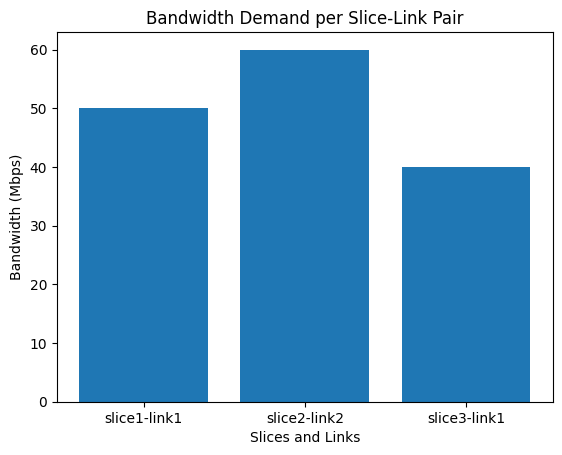

In [8]:
# -------------------------------
# Define data
# -------------------------------
slices = ["slice1", "slice2", "slice3"]
links = ["link1", "link2"]
capacity = {"link1": 100, "link2": 120}
demand = {("slice1","link1"):50, ("slice2","link2"):60, ("slice3","link1"):40}

# -------------------------------
# Define model
# -------------------------------
model = LpProblem("5G_Slicing", LpMaximize)
x = LpVariable.dicts("x", (slices, links), cat="Binary")

# Objective
model += lpSum(demand[(s,l)] * x[s][l] for (s,l) in demand.keys())

# Constraints
for l in links:
    model += lpSum(demand[(s,l)] * x[s][l]
                   for (s,l2) in demand.keys() if l2 == l) <= capacity[l]

# -------------------------------
# Solve
# -------------------------------
model.solve()

# -------------------------------
# Results
# -------------------------------
print("Status:", model.status)
for s in slices:
    for l in links:
        if x[s][l].value() == 1:
            print(f"Slice {s} assigned to {l}")

print("Total optimized bandwidth:", model.objective.value())

# -------------------------------
# Visualization
# -------------------------------
labels = [f"{s}-{l}" for s,l in demand.keys()]
values = [demand[(s,l)] for s,l in demand.keys()]
plt.bar(labels, values)
plt.title("Bandwidth Demand per Slice-Link Pair")
plt.xlabel("Slices and Links")
plt.ylabel("Bandwidth (Mbps)")
plt.show()
